In [164]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

In [167]:
import numpy as np
def vectorize_sequences(sequences,dimension=1000):
  result = np.zeros((len(sequences),dimension))
  for i,sequence in  enumerate(sequences):
    result[i,sequence]=1
  return result

In [168]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [146]:
x_train = x_train.toarray()
x_test = x_test.toarray()


In [169]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='RMSprop',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

In [170]:
history = model.fit(
    x_train,
    y_train,
    epochs= 12,
    batch_size = 50,
    validation_data=(x_test,y_test)
)

Epoch 1/12
500/500 [==============================] - 5s 10ms/step - loss: 0.3807 - binary_accuracy: 0.8267 - val_loss: 0.3302 - val_binary_accuracy: 0.8556
Epoch 2/12
500/500 [==============================] - 5s 9ms/step - loss: 0.3066 - binary_accuracy: 0.8718 - val_loss: 0.3291 - val_binary_accuracy: 0.8554
Epoch 3/12
500/500 [==============================] - 4s 8ms/step - loss: 0.2623 - binary_accuracy: 0.8951 - val_loss: 0.3506 - val_binary_accuracy: 0.8538
Epoch 4/12
500/500 [==============================] - 4s 8ms/step - loss: 0.2060 - binary_accuracy: 0.9250 - val_loss: 0.3656 - val_binary_accuracy: 0.8542
Epoch 5/12
500/500 [==============================] - 5s 9ms/step - loss: 0.1459 - binary_accuracy: 0.9524 - val_loss: 0.4332 - val_binary_accuracy: 0.8518
Epoch 6/12
500/500 [==============================] - 4s 9ms/step - loss: 0.0941 - binary_accuracy: 0.9729 - val_loss: 0.5383 - val_binary_accuracy: 0.8470
Epoch 7/12
500/500 [==============================] - 4s 9ms/st

<Axes: title={'center': 'Loss curves'}, xlabel='Epoch', ylabel='Loss'>

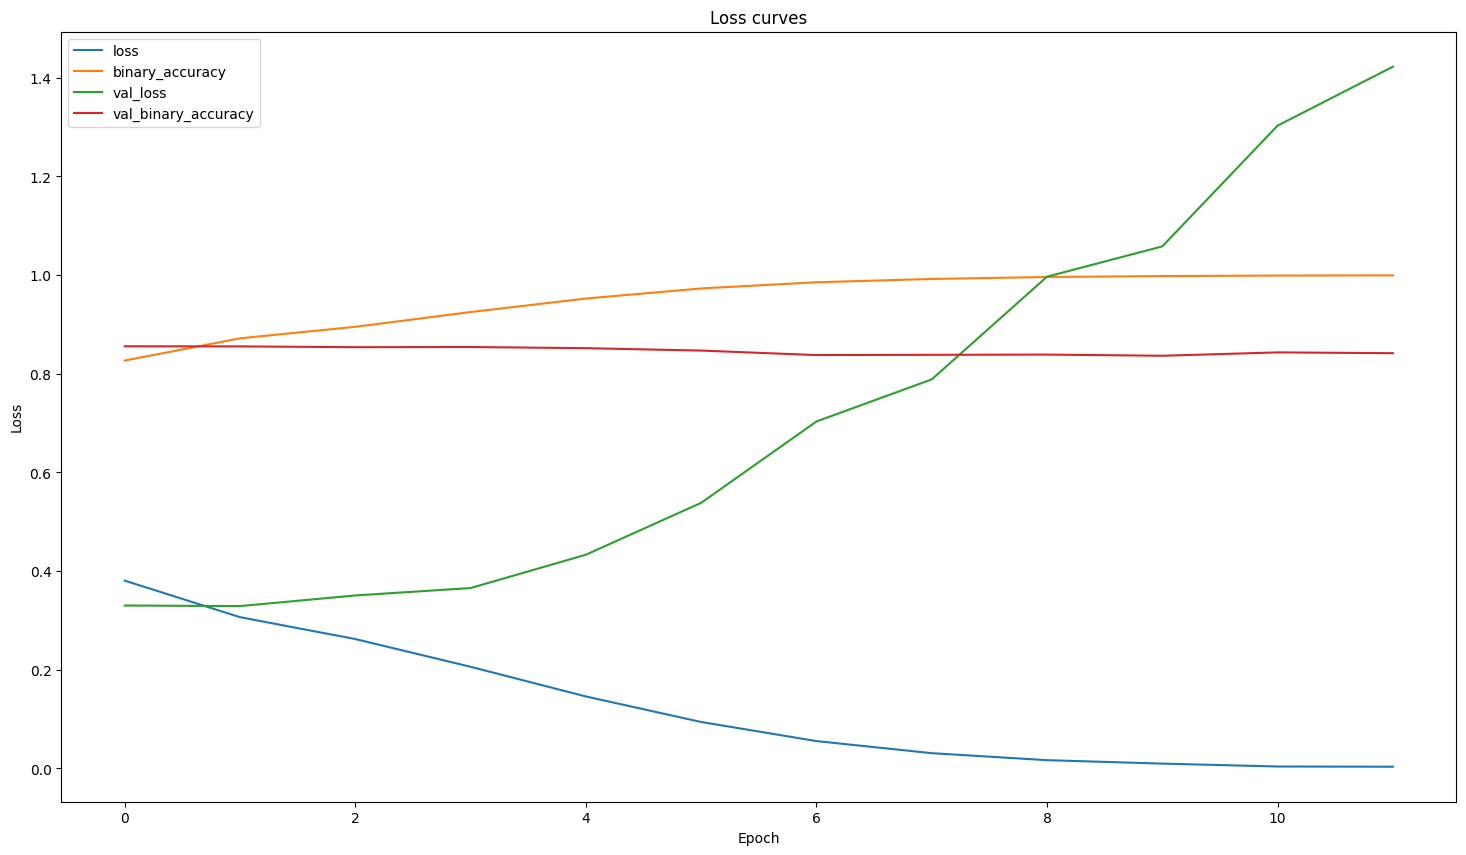

In [172]:
pd.DataFrame(history.history).plot(figsize=(18,10),xlabel="Epoch",ylabel="Loss",title="Loss curves")

In [173]:
import numpy as np
y_pred = np.round(model.predict(x_test))

782/782 [==============================] - 2s 2ms/step


In [174]:
dfo= pd.DataFrame()
dfo['y_test']=y_test
dfo['y_pred']=pd.DataFrame(y_pred)
dfo.head()

,y_test,y_pred
0,0,0.0
1,1,1.0
2,1,1.0
3,0,1.0
4,1,1.0


In [175]:
import sklearn
sklearn.metrics.accuracy_score(y_test,y_pred)

0.84164